<a href="https://colab.research.google.com/github/nevesmarcos42/classificacao-tumores-mama/blob/main/Projeto_Classifca%C3%A7%C3%A3o_para_Tumor_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vamos prever se um tumor de mama é benigno ou maligno com base em várias características.**

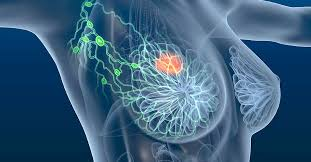

> ***Exploraremos o dataset para entender suas características:***

In [65]:
import pandas as pd

# Carregar os dados
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto Tumor de Mama/data.csv')

# Mostrar as primeiras linhas do dataset
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness


> ***Trataremos valores ausentes e faremos outras limpezas necessárias:***


In [66]:
# Verificar valores ausentes
print(data.isnull().sum())

# Excluir colunas desnecessárias
data.drop(columns=['Unnamed: 32', 'id'], inplace=True)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

> ***Criaremos novos recursos para melhorar o modelo:***

In [67]:
# Converter colunas categóricas em numéricas
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})



> ***Dividiremos os dados em conjuntos de treino e teste:***



In [68]:
from sklearn.model_selection import train_test_split

#Seleciona as features e o alvo
features = data.columns[1:]
X = data[features]
y = data['diagnosis']

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> ***Escolheremos um modelo de rede neural simples com TensorFlow:***



In [69]:
import tensorflow as tf
from tensorflow import keras

# Criar o modelo
model = keras.Sequential([
    keras.Input(shape=(len(features),)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])



>***Treinaremos o modelo com os dados de treino:***



In [70]:
# Compila o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treina o modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4799 - loss: 62.9712 - val_accuracy: 0.4123 - val_loss: 5.0710
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5150 - loss: 46.0449 - val_accuracy: 0.3860 - val_loss: 10.9553
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5563 - loss: 32.4610 - val_accuracy: 0.5088 - val_loss: 3.8976
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5563 - loss: 20.7059 - val_accuracy: 0.7544 - val_loss: 1.2806
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6195 - loss: 14.4733 - val_accuracy: 0.9298 - val_loss: 0.2943
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6433 - loss: 12.6721 - val_accuracy: 0.8158 - val_loss: 0.7735
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6374 - loss: 10.6375 - val_accuracy: 0.8421 - val_loss: 0.6254
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6789 - loss: 9.6573 - val_accuracy: 0.



> ***Avaliaremos o desempenho do modelo nos dados de validação:***



In [71]:
Val_loss, Val_accuracy = model.evaluate(X_test, y_test)
print(f'Val_loss: {Val_loss}, Val_accuracy: {Val_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9502 - loss: 0.2453
Val_loss: 0.24681305885314941, Val_accuracy: 0.9561403393745422




> ***Usaremos validação cruzada para garantir que o modelo está generalizando bem:***



In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

# Criar uma classe base para o modelo Keras para validação cruzada
class KerasClassifier(BaseEstimator):
    def fit(self, X, y):
        self.model = keras.Sequential([
            keras.Input(shape=(len(features),)),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=50, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]

# Usar validação cruzada
classifier = KerasClassifier()
scores = cross_val_score(classifier, X, y, cv=5)
print(f'Cross-validation scores: {scores}')


Cross-validation scores: [0.88596493 0.88596493 0.95614034 0.94736844 0.90265489]




> ***Vamos visualizar os resultados graficamente:***

**Histórico de Treinamento e Validação**


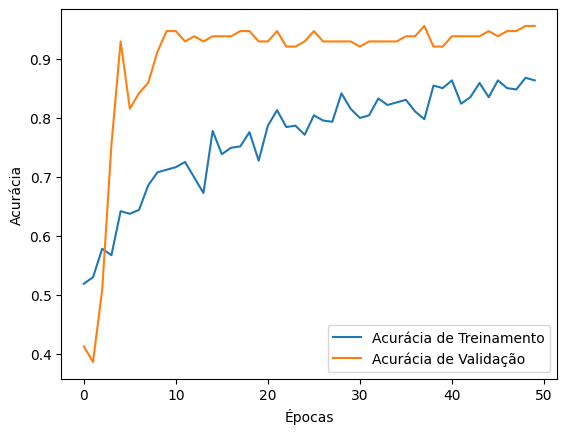

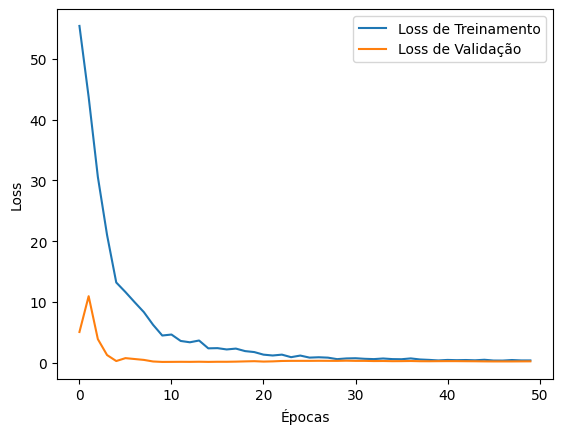

In [73]:
import matplotlib.pyplot as plt

# Plotar acurácia
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Plotar loss
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()




> ***Matriz de Confusão***



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


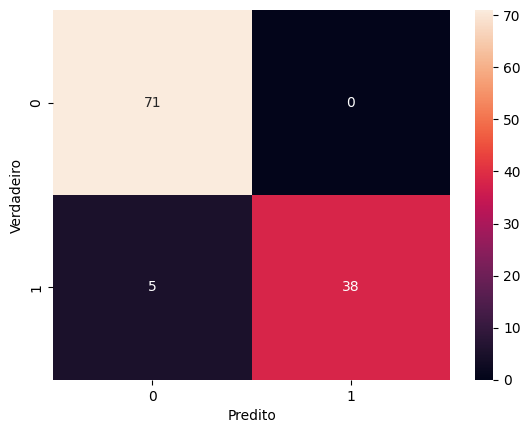

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Previsões
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()




> ***Curva ROC e AUC***



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


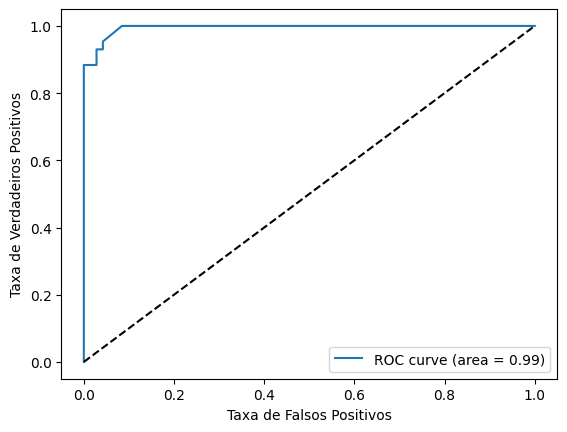

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular probabilidades
y_probs = model.predict(X_test).ravel()

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plotar a curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='best')
plt.show()

# Conclusão Final
***O modelo desenvolvido para a classificação de tumores de mama está performando de maneira excelente, com alta acurácia e boa generalização para novos dados. No entanto, há espaço para reduzir o número de falsos negativos, possivelmente através de ajustes finos no modelo ou pela incorporação de mais dados. As métricas gerais indicam que o modelo é robusto e eficaz para a detecção de tumores malignos, o que é crucial para intervenções médicas precisas.***



> ***Salvar e Carregar o Modelo:***



In [ ]:
# Salvar modelo
model.save('modelo_treinado.h5')

# Carregar modelo
model = keras.models.load_model('modelo_treinado.h5')
